<a href="https://colab.research.google.com/github/shemaaali/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231_assignment/SDA9_Project2_LS_DS18_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    url_train = 'https://raw.githubusercontent.com/oyrx/PHBS_MLF_2019_Project/master/data/train.csv'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

     |████████████████████████████████| 81kB 2.1MB/s 
     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 604kB 31.3MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 3.1MB 45.6MB/s 
     |████████████████████████████████| 296kB 26.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=8d8f77073263f3bfc11bd82a334a039b2821e0b580b2702e3a2fa891f48b4e29
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=ba90d845cbc5aa3ab63022f930149b2d09444b2ad63824ef1a956f37b9cb3877
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin image

In [199]:
# Some imports setup for the environment for python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Some imports setup for the environment for machine learnig
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [240]:
# Loading the dataset file and read it
url_hotel = 'https://raw.githubusercontent.com/oyrx/PHBS_MLF_2019_Project/master/data/hotel_bookings.csv'

hotel_booked = pd.read_csv(url_hotel)

print(hotel_booked.shape)
hotel_booked.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Choosing The Target That I am Going To Predict

### Which column in my tabular dataset will I predict?

In [242]:
# some description about reservation_status
hotel_booked['reservation_status'].describe()

count        119390
unique            3
top       Check-Out
freq          75166
Name: reservation_status, dtype: object

In [243]:
# Derive a binary classification target
# I Coverate the booking_status to a binary classification problem rather than discrete
# Drope all unuseful hotel booking
hotel_booked = hotel_booked.dropna(subset=['reservation_status'])
hotel_booked['booking_status'] = hotel_booked['reservation_status']
hotel_booked['booking_status'] = hotel_booked['booking_status'].apply(lambda x: 1 if x =='Canceled' else 0)

### How is my target distributed?

In [244]:
# Define a status hotel booking as having booking_status rating of 0 and higher as 1
hotel_booked['booking_status'].describe()

count    119390.000000
mean          0.360307
std           0.480091
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: booking_status, dtype: float64

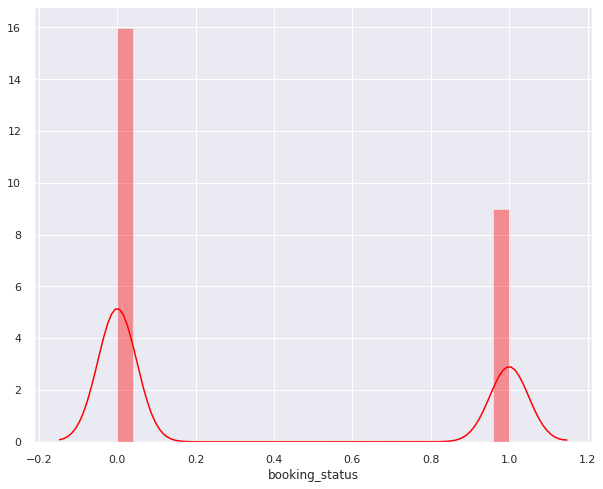

In [118]:
# plot the distribution for booking_status rating of 0 and 1 as higher
plt.figure(figsize= (10,8))
sns.distplot(hotel_booked['booking_status'], color='red');

#### My target is a classification problem:
I have derived my target as a binary classification problem:to answer a binary questions whether the booking_status checked out:0 or canceled:1

### How many classes?

In [245]:
# I can assign my target to a variable is called my_target
my_target = hotel_booked['booking_status'] 

In [246]:
# check for the first 10 booking_status in my_target
my_target.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: booking_status, dtype: int64

In [247]:
# how many numbers of nunique values are in my target column?
my_target.nunique()

2

### There are two class, and they are binary classification problems

#### Are the classes imbalanced?

In [248]:
# value counts for each class
my_target.value_counts(normalize=True)

0    0.639693
1    0.360307
Name: booking_status, dtype: float64

In [249]:
# the max value counts
my_target.value_counts(normalize=True).max()

0.6396934416617808

#### Sometimes, the majority class occurs with less than 50% frequency which can be a mis-leading. In this case, if it happens, accuracy is not good as an evaluation metrix.
For my target the majority class occurs with 63% frequency, so I gues this is not too imbalanced.
I could just use accuracy score as my evaluation metric if I want to deep more there are other options like precision, recall, and roc-auc. Sometimes, the majority class occurs with less than 50% frequency which can be a mis-leading. In this case, if it happens, accuracy is not good.

### Choosing My Evaluation Metrixes
In addtion to Accuracy, I am going to use ROC-AUC/ Precision and Recall, Confusion-Metrix, and Classification Report.

### Begin With Cleaning Data and Exploratory Data Analysis

#### Import Wrangle

In [250]:
# some information about the dataset
hotel_booked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [251]:
# some some description about the dataset
hotel_booked.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,booking_status
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,0.360307
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.480091
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,1.000000


In [252]:
# checking for any missing values
hotel_booked.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Exploratory And Data Analysis(EDA)

In [19]:
from pandas_profiling import ProfileReport
# pull the report profile for my dataset
profile = ProfileReport(hotel_booked, minimal=True).to_notebook_iframe()

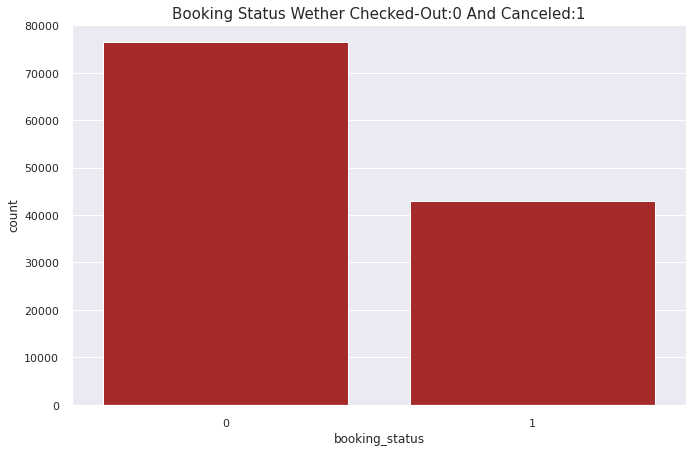

In [127]:
# use a seaborn countplot to plot booking_status
plt.figure(figsize= (11,7))
ax = sns.countplot(x = "booking_status", data = hotel_booked, color='brown', saturation=2, dodge=True);
sns.set(style = "darkgrid");
plt.title("Booking Status Wether Checked-Out:0 And Canceled:1", fontdict = {'fontsize': 15});

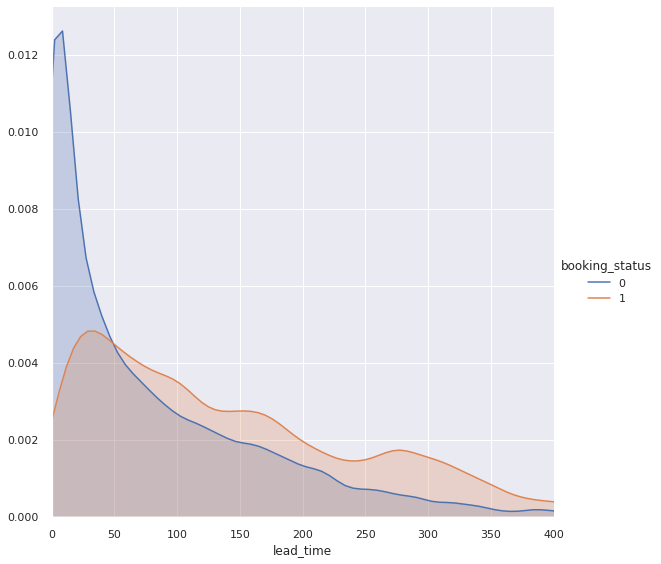

In [128]:
# make a density curve of lead time per booking_status
lead_booking = (sns.FacetGrid(hotel_booked, hue='booking_status', height=8, xlim=(0,400), legend_out=True).map(sns.kdeplot, 'lead_time', shade=True).add_legend());

In [253]:
resort_hotel = hotel_booked[hotel_booked["hotel"] == "Resort Hotel"]
city_hotel = hotel_booked[hotel_booked["hotel"] == "City Hotel"]

cancel_reso = pd.DataFrame(resort_hotel["is_canceled"].value_counts())
cancel_reso.rename(columns={"is_canceled": "booking_cancellations"}, index =({0: "No Canceled", 1:"Yes Canceled"}), inplace=True)
cancel_reso["Status"] = cancel_reso.index

cancel_city = pd.DataFrame(city_hotel["is_canceled"].value_counts())
cancel_city.rename(columns={"is_canceled": "booking_cancellations"}, index =({0: "No Canceled", 1:"Yes Canceled"}), inplace=True)
cancel_city["Status"] = cancel_city.index


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles = ["City Hotel", "Resort Hotel"])
fig.add_trace(go.Pie(values = cancel_city["booking_cancellations"], labels = cancel_city["Status"]),1,1)
fig.add_trace(go.Pie(values = cancel_reso["booking_cancellations"], labels = cancel_reso["Status"]),1,2)
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.update_layout(title_text = "Type Of Booking Cancellations For City Hotel And Resort Hotel")
fig.show()

In [25]:
# scatter plot between booking_status and lead_time
px.scatter(hotel_booked, x='booking_status', y='lead_time', color='booking_status', opacity=0.1)

(0.0, 170.0)

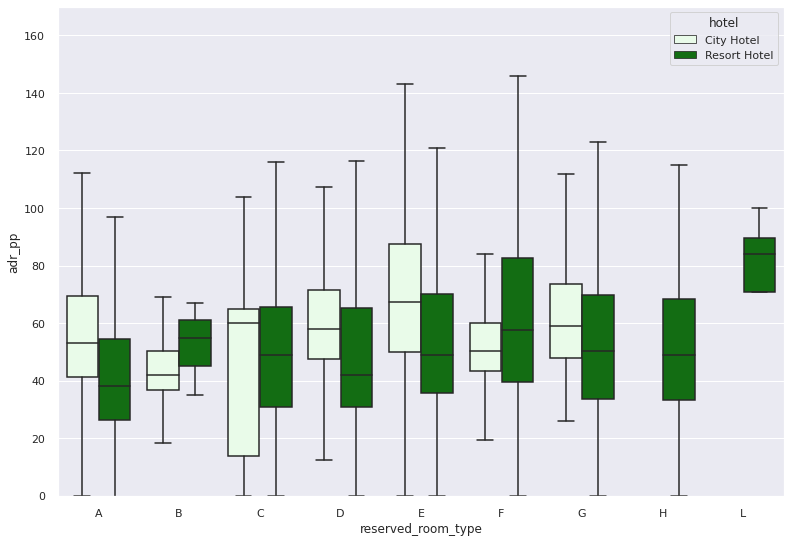

In [254]:
# add new feature engineering from existing adr column
# make a new column called total overnight cost in each hotel for guest
hotel_booked["adr_pp"] =hotel_booked["adr"] / (hotel_booked["adults"] + hotel_booked["children"])
room_guest = hotel_booked[hotel_booked["booking_status"]==0]
room_cost = room_guest[["hotel", "adr_pp", "reserved_room_type"]].sort_values("reserved_room_type")

plt.figure(figsize= (13,9))
sns.boxplot(x="reserved_room_type", y= "adr_pp", hue="hotel", data= room_cost, fliersize=0, color='green', saturation=0.70, width=0.8, dodge=True )
plt.ylim(0,170)

In [255]:
hotel_booked.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_status,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,49.0


In [256]:
# countries that show the most total number of guests for each hotel
country_guest = pd.DataFrame(hotel_booked.loc[hotel_booked['booking_status'] == 0]["country"].value_counts())
country_guest.index.name = "country"
country_guest.rename(columns={"country": "Number of Guests"}, inplace=True)
total_num_guests = country_guest["Number of Guests"].sum()
country_guest["% Guests"] = round(country_guest["Number of Guests"] / total_num_guests * 100, 2)

In [257]:
# country per guest shows on the map
guest_per_country = px.choropleth(country_guest,
                    locations=country_guest.index,
                    color=country_guest["% Guests"], 
                    hover_name=country_guest.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="The Majority Countries That Guests Come From")
guest_per_country.show()

### My Wrangler Data Function
I have defined a function do all cleaning data and return my_wrangler_data

In [258]:
# define a wrangle function to deal with training, validation, and testing data
# Do some cleaning and making feature engineering
import numpy as np

def my_wrangler_data(X):
    
    # SettingWithCopyWarning
    X = X.copy()


    # replace those columns that have missing value and drop the subset of children
    null_values = {"country": "Unknown", "agent": 0, "company": 0}
    X = X.fillna(null_values)
    X.dropna(subset = ["children"], inplace = True)

    # droping all invalids entries for adults, children, babies, weekened-nights, week-night, and adr
    X.drop(X[(X["adults"] == 0) & (X["children"] == 0) & (X["babies"] == 0)].index, inplace = True)
    X.drop(X[(X["stays_in_weekend_nights"] == 0) & (X["stays_in_weekend_nights"] == 0) & (X["adr"] == 0)].index, inplace = True)
    

    # Ajdusting the some names of columns in the dataset
    X.rename(columns = {"is_canceled": "booking_cancellations","arrival_date_year":"year", "arrival_date_month":"month", "arrival_date_week_number": "week_number", "arrival_date_day_of_month":"day_of_month", "stays_in_weekend_nights":"weekend_nights", "stays_in_week_nights":"week_nights"}, inplace=True)
     

    # the different between booking cancellations in City Hotel and Resort Hotel
    resort_hotel = X[X["hotel"] == "Resort Hotel"]
    city_hotel =  X[X["hotel"] == "City Hotel"]

    cancel_reso = pd.DataFrame(resort["is_canceled"].value_counts())
    cancel_reso.rename(columns={"is_canceled": "booking_cancellations"}, index =({0: "No Canceled", 1:"Yes Canceled"}), inplace=True)
    cancel_reso["Status"] = cancel_reso.index

    cancel_city = pd.DataFrame(city_hotel["is_canceled"].value_counts())
    cancel_city.rename(columns={"is_canceled": "booking_cancellations"}, index =({0: "No Canceled", 1:"Yes Canceled"}), inplace=True)
    cancel_city["Status"] = cancel_city.index


    # countries that show the most total number of guests for each hotel
    country_guest = pd.DataFrame(X.loc[X['booking_status'] == 0]["country"].value_counts())
    country_guest.index.name = "country"
    country_guest.rename(columns={"country": "Number of Guests"}, inplace=True)
    total_num_guests = country_guest["Number of Guests"].sum()
    country_guest["% Guests"] = round(country_guest["Number of Guests"] / total_num_guests * 100, 2)

    # add new feature engineering from existing adr column
    # make a new column called total overnight cost in each hotel for guest
    X["adr_pp"] = X["adr"] / (X["adults"] + X["children"])
    room_guest = X[X["booking_status"]==0]
    room_cost = room_guest[["hotel", "adr_pp", "reserved_room_type"]].sort_values("reserved_room_type")

    # Add target feature
    if 'reservation_status' in X.columns:
      X['booking_status'] = X['booking_status'].apply(lambda x: 1 if x =='Canceled' else 0)

    # drop the reservation_status from the previous dataset
    X.drop('reservation_status', axis=1, inplace=True)

    
    # treat all my dataset at the same way for training, validation, and testing
    train = my_wrangler_data(train)
    val = my_wrangler_data(val)
    test = my_wrangler_data(test)

    # return my wrangler data function
    return X
  

    # Loading the dataset file and read it
    url_hotel = 'https://raw.githubusercontent.com/oyrx/PHBS_MLF_2019_Project/master/data/hotel_bookings.csv'

    hotel_booked = my_wrangler_data(pd.read_csv(url_hotel))

In [259]:
 hotel_booked['booking_status']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: booking_status, Length: 119390, dtype: int64

### Choose which observations I will use to train, validate, and test my model.

#### Split Data

In [329]:
# Split my feature matrix and target vector
y = hotel_booked['booking_status']
X = hotel_booked.drop(['booking_status'], axis=1)

In [330]:
# train on reviews from 2015 & earlier. Validate on 2016. Test on 2017 & later
hotel_booked['reservation_status_date'] = pd.to_datetime(hotel_booked['reservation_status_date'])
train = hotel_booked[hotel_booked['reservation_status_date'].dt.year <= 2015]
val = hotel_booked[hotel_booked['reservation_status_date'].dt.year == 2016]
test =hotel_booked[hotel_booked['reservation_status_date'].dt.year >= 2017]

In [331]:
# prrint out all shapes for training data and validation data
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(25110, 14)
(25110,)
(57797, 14)
(57797,)
(36483, 14)
(36483,)


### Begin to choose which features, if any, to exclude.

In [332]:
# Selecting features
# The booking_status column is the my target
my_target = 'booking_status'
 
# Get a dataframe with all train columns except the target and the high cardinalities
train_features = hotel_booked.columns.drop([my_target], 'reservation_status_date')

 
# Get a list of the numerical features and categorical_features Top 14 features
numerical_features = ['total_of_special_requests', 'lead_time', 'is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled',
                      'stays_in_week_nights', 'required_car_parking_spaces']
categorical_features = ['arrival_date_month', 'deposit_type', 'reserved_room_type','hotel', 'customer_type',
 'market_segment', 'meal']
 
# Combine all the lists 
my_features = numerical_features + categorical_features

In [333]:
# Arrange data into features matrix and target vector 
X_train = train[my_features]
y_train = train[my_target]
X_val = val[my_features]
y_val = val[my_target]
X_test = test[my_features]
y_test = test[my_target]

In [334]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(25110, 14)
(25110,)
(57797, 14)
(57797,)
(36483, 14)
(36483,)


#### Get the top 13 features

In [335]:
# Top 13 features
my_features

['total_of_special_requests',
 'lead_time',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'stays_in_week_nights',
 'required_car_parking_spaces',
 'arrival_date_month',
 'deposit_type',
 'reserved_room_type',
 'hotel',
 'customer_type',
 'market_segment',
 'meal']

### BaseLine

In [336]:
print('Baseline Training Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Training Accuracy: 0.5437275985663083


### Build The Model

In [347]:
# appropriator importance estimators to setup python enironment
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import randint, uniform
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

my_target = 'booking_status'
# Get a dataframe with all train columns except the target and the high cardinalities
train_features = hotel_booked.columns.drop([my_target], 'reservation_status_date')
# Arrange data into features matrix and target vector 
X_train = train[my_features]
y_train = train[my_target]
X_val = val[my_features]
y_val = val[my_target]
X_test = test[my_features]
y_test = test[my_target]

In [349]:
hotel_booked = hotel_booked.drop(columns=['reservation_status'])

### On One Hot Encoder

In [350]:
# one hot encoder on all the non-numerical columns
encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()
Logistic_model = LogisticRegression(max_iter=1000)

X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded.head()

,total_of_special_requests,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,stays_in_week_nights,required_car_parking_spaces,arrival_date_month_July,arrival_date_month_August,arrival_date_month_September,arrival_date_month_October,arrival_date_month_November,arrival_date_month_December,arrival_date_month_January,arrival_date_month_February,arrival_date_month_March,arrival_date_month_April,arrival_date_month_May,arrival_date_month_June,deposit_type_No Deposit,deposit_type_Refundable,deposit_type_Non Refund,reserved_room_type_C,reserved_room_type_A,reserved_room_type_D,reserved_room_type_E,reserved_room_type_G,reserved_room_type_F,reserved_room_type_H,reserved_room_type_L,reserved_room_type_B,hotel_Resort Hotel,hotel_City Hotel,customer_type_Transient,customer_type_Contract,customer_type_Transient-Party,customer_type_Group,market_segment_Direct,market_segment_Corporate,market_segment_Online TA,market_segment_Offline TA/TO,market_segment_Complementary,market_segment_Groups,market_segment_Undefined,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,0,342,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,737,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,7,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,13,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,14,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


### Would some features “leak” future information?

In [351]:
tree_model = make_pipeline(ce.OrdinalEncoder(),
                       SimpleImputer(strategy='mean'), 
                       StandardScaler(),
                       DecisionTreeClassifier(max_depth=3)
)

In [352]:
tree_model

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=None, drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=None, return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_..._std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None

In [353]:
# Fitting the tree_model 
tree_model.fit(X_train, y_train);

In [354]:
# Check Evaluation Metrics for the tree_model
print('Traing Accuracy:', tree_model.score(X_train, y_train))
print('Validation Accuracy:', tree_model.score(X_val, y_val))
print('Testing Accuracy:', tree_model.score(X_test, y_test))

Traing Accuracy: 0.8982078853046594
Validation Accuracy: 0.5503399830441026
Testing Accuracy: 0.4027903407066305


#### yes, all the my traing, validation, and testing data show a %100 accuracy. So, that mean some features “leak” future information. So, that was really good to check your accuracy. I was doing something wrong, and I shoud fix it first and move on the next step.

In [355]:
# Get the insight of the tree model
classifier = tree_model.named_steps['decisiontreeclassifier']
feature_names = tree_model.named_steps['ordinalencoder'].feature_names

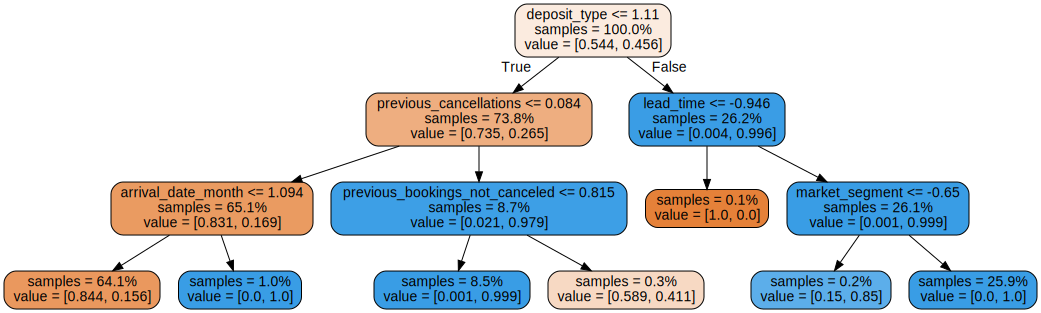

In [356]:
# Making  a visualization for the tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=feature_names,
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

#### So, in-order to fix the leakage issue. First, I shoud drop the column that cause leakage which is the reservation_status column from the previous dataset.

#### Rebuilding The Tree Desicion Model Again after fixing that issue

In [357]:
tree_model1 = make_pipeline(OrdinalEncoder(),
                       SimpleImputer(strategy='mean'), 
                       StandardScaler(),
                       DecisionTreeClassifier(max_depth=3)
)

In [358]:
tree_model1

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=None, drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=None, return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_..._std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None

In [359]:
# Fitting the tree_model 
tree_model1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['arrival_date_month', 'deposit_type',
                                      'reserved_room_type', 'hotel',
                                      'customer_type', 'market_segment',
                                      'meal'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'arrival_date_month',
                                          'data_type': dtype('O'),
                                          'mapping': July          1
August        2
September     3
October       4
November      5
D...
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=3,
    

In [360]:
# Check Evaluation Metrics for the tree_model
print('Traing Accuracy:', tree_model1.score(X_train, y_train))
print('Validation Accuracy:', tree_model1.score(X_val, y_val))
print('Testing Accuracy:', tree_model1.score(X_test, y_test))

Traing Accuracy: 0.8982078853046594
Validation Accuracy: 0.5503399830441026
Testing Accuracy: 0.4027903407066305


In [297]:
# Get the insight of the tree model
classifier = tree_model1.named_steps['decisiontreeclassifier']
feature_names = tree_model1.named_steps['ordinalencoder'].feature_names

In [ ]:
# Making  a visualization for the tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=feature_names,
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

#### Building Model With Logistic

In [363]:
Logistic_model = make_pipeline(ce.OrdinalEncoder(),
                       SimpleImputer(strategy='mean'), 
                       StandardScaler(),
                       LogisticRegression(max_iter=1000)
)

In [364]:
# Fitting the tree_model 
Logistic_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['arrival_date_month', 'deposit_type',
                                      'reserved_room_type', 'hotel',
                                      'customer_type', 'market_segment',
                                      'meal'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'arrival_date_month',
                                          'data_type': dtype('O'),
                                          'mapping': July          1
August        2
September     3
October       4
November      5
D...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,


In [365]:
# Check Evaluation Metrics for the logistic_model
print('Traing Accuracy:', Logistic_model.score(X_train, y_train))
print('Validation Accuracy:', Logistic_model.score(X_val, y_val))
print('Testing Accuracy:', Logistic_model.score(X_test, y_test))

Traing Accuracy: 0.8882516925527678
Validation Accuracy: 0.7407131858054916
Testing Accuracy: 0.7548721322259683


#### Build The Model With RandomForest

In [366]:
# Make pipeline as a one package for all
Rand_forest = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=40, random_state=42, n_jobs=-1)
)

In [367]:
# Fitting the tree_model 
Rand_forest.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['arrival_date_month', 'deposit_type',
                                      'reserved_room_type', 'hotel',
                                      'customer_type', 'market_segment',
                                      'meal'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'arrival_date_month',
                                          'data_type': dtype('O'),
                                          'mapping': July          1
August        2
September     3
October       4
November      5
D...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max

In [368]:
# Check Evaluation Metrics for the Rand_forest
print('Traing Accuracy:', Rand_forest.score(X_train, y_train))
print('Validation Accuracy:', Rand_forest.score(X_val, y_val))
print('Testing Accuracy:', Rand_forest.score(X_test, y_test))

Traing Accuracy: 0.9751891676622859
Validation Accuracy: 0.557693305880928
Testing Accuracy: 0.3995285475426911


#### Importance Features

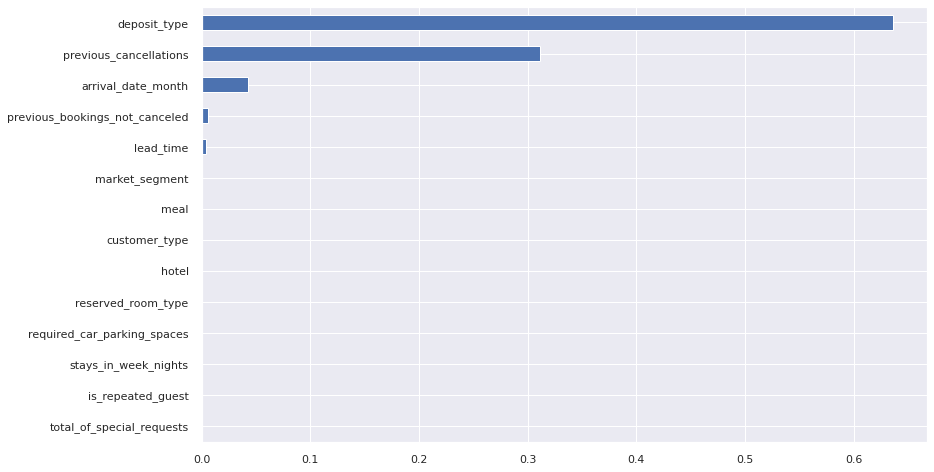

In [369]:
# Importance features of my tree to get the top 14 features
import matplotlib.pyplot as plt

# Get the insight of the tree model
classifier = tree_model1.named_steps['decisiontreeclassifier']
feature_names = tree_model1.named_steps['ordinalencoder'].feature_names

features_importances = classifier.feature_importances_
importances = pd.Series(features_importances, index=feature_names)

plt.figure(figsize=(13,8))
importances.sort_values().plot(kind='barh');

In [371]:
# Predictor
y_pred = Logistic_model.predict(X_val)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

### Confusion Matrix(Accuracy Precision/and Recall)

In [372]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [373]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.7407131858054916

#### Plot_Confusion_Matrix

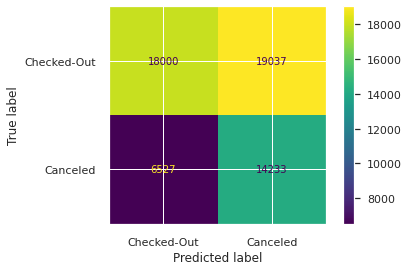

In [374]:
# Plot_Confusion_Matrix for randomforest
plot_confusion_matrix(Rand_forest, X_val, y_val, 
                      values_format=".0f", include_values=True, xticks_rotation='horizontal', 
                      display_labels=['Checked-Out', 'Canceled']);

In [375]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_val, y_pred, average=None)

array([0.71501004, 0.94292728])

In [376]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_val, y_pred, average=None)

array([0.98995599, 0.2960501 ])

In [377]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[36665,   372],
       [14614,  6146]])

In [378]:
# print print classification_report
print(classification_report(y_val, Logistic_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83     37037
           1       0.94      0.30      0.45     20760

    accuracy                           0.74     57797
   macro avg       0.83      0.64      0.64     57797
weighted avg       0.80      0.74      0.69     57797



In [379]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [380]:
# predict a probability with roc_curve
y_predict_proba = Rand_forest.predict_proba(X_val)[:, -1]
fpr, tpr, thresholds = roc_curve(y_val, y_predict_proba)

In [381]:
# predict a probability of roc_curve table resualts
FP_TP_TR = pd.DataFrame({"False Positive Rate": fpr,
              "True Positive Rate": tpr,
              "Thresholds Rate": thresholds})

In [382]:
FP_TP_TR

,False Positive Rate,True Positive Rate,Thresholds Rate
0,0.000000,0.000000,2.000000
1,0.022275,0.225048,1.000000
2,0.022329,0.225048,0.997500
3,0.022329,0.226012,0.995833
4,0.022383,0.226012,0.983333
...,...,...,...
1809,0.911278,0.979721,0.001923
1810,0.911278,0.979769,0.001724
1811,0.911467,0.979817,0.001667
1812,0.911521,0.979817,0.001087


In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

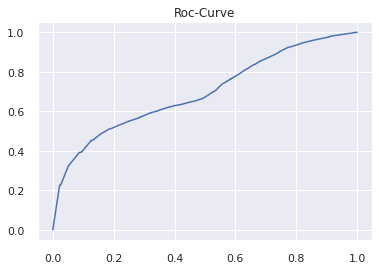

In [384]:
# plot the the roc_curve resualts
px.scatter(fpr, tpr);
plt.plot(fpr, tpr);
plt.title("Roc-Curve")
plt.show()

In [385]:
# Calculating the area under the curve 
# rating from 0 to 1, and  the higher is better
from sklearn.metrics import roc_auc_score
y_predict_proba = Rand_forest.predict_proba(X_test)[:, -1]
print("Thet Test of The Roc_Auc", roc_auc_score(y_test, y_predict_proba))

Thet Test of The Roc_Auc 0.6336082882321639
